# **LOADING IMAGES USING KERAS API**

# Import packages

In [2]:
import glob  # useful for listing files in folders by pattern matching
import os     # Provides a way to interact with the operating system
import tarfile  # Used to read and write tar archives, which are often used to package multiple files into one compressed file.
import matplotlib.pyplot as plt # pyplot provides functions to create a variety of plots and charts easily.
from tensorflow.keras.preprocessing.image import ImageDataGenerator # help preprocess and augment (modify) images for training machine learning models
from tensorflow.keras.preprocessing.image import load_img, img_to_array #  Functions to load images from files and convert them into numeric arrays (tensors)
from tensorflow.keras.utils import get_file # A utility for downloading files from a URL


# Defne the URL and destination of the CINIC-10 dataset, an alternative to the
famous CIFAR-10 dataset

In [3]:
DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'


DATA_NAME = 'cinic10'

FILE_EXTENSION = 'tar.gz'

FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])

# Download and Decompress the Data

In [4]:
downloaded_file_location = get_file(origin=DATASET_URL,fname=FILE_NAME, extract=False)
# extract=False, means it won't automatically decompress archives

# Build the path to the data directory based on the location of the downloaded file
data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)
# splits the full file path into two parts


data_directory = os.path.sep.join([data_directory,DATA_NAME])
# appends the DATA_NAME folder to the data_directory path.


# Only extract the data if it hasn't been already
if not os.path.exists(data_directory):
  tar = tarfile.open(downloaded_file_location)
  tar.extractall(data_directory)




687544992/687544992 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step


/tmp/ipython-input-2781173748.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(data_directory)


In [5]:
!ls /root/.keras/datasets/ # list file & folder in the .keras/datasets directory

cinic10  cinic10.tar.gz


# Load all images path and print the number of images found

In [6]:
data_pattern = os.path.sep.join([data_directory, '*/*/*.png'])
image_paths = list(glob.glob(data_pattern))

print(f'there are {len(image_paths):,} images in the dataset')

# wildcards: (*/*/*.png.)
#This pattern means: look inside data_directory for any folder, then any subfolder, and then all .png files inside that.

"""

    glob.glob(data_pattern) searches the filesystem using this pattern.

    It collects all file paths matching the pattern (*.png files in nested subdirectories) into a list.

    Wrapping it in list() converts the result to a list of file paths.

"""

there are 270,000 images in the dataset


'\n\n    glob.glob(data_pattern) searches the filesystem using this pattern.\n\n    It collects all file paths matching the pattern (*.png files in nested subdirectories) into a list.\n\n    Wrapping it in list() converts the result to a list of file paths.\n\n'

# Load a single image from the dataset and print its metadat

In [7]:
sample_image = load_img(image_paths[0])
print(f'image type: {type(sample_image)}')
print(f'image format: {sample_image.format}')
print(f'image_mode: {sample_image.mode}')
print(f'image_size: {sample_image.size}')

image type: <class 'PIL.PngImagePlugin.PngImageFile'>
image format: PNG
image_mode: RGB
image_size: (32, 32)


# Convert an Image into a numpy array

In [8]:
sample_image_array = img_to_array(sample_image)
print(f'image type: {type(sample_image_array)}')
print(f'image array shape: {sample_image_array.shape}')

image type: <class 'numpy.ndarray'>
image array shape: (32, 32, 3)


# Display image using matplotlib

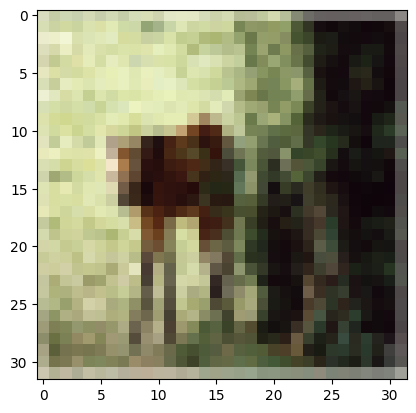

In [9]:
plt.imshow(sample_image_array / 255.0) # Division by 255.0 is to nornalize the image[1, 0]

# Load a batch of images using ImageDataGenerator
each image will be rescaled to [1,0]

In [10]:
image_generator = ImageDataGenerator(horizontal_flip=True, rescale=1.0 / 255.0)

# Using image_generator, we'll pick and display a random batch of 10 images
directly from the directory they are stored in:

Found 270000 images belonging to 3 classes.


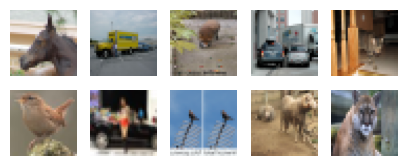

In [11]:
iterator = (image_generator.flow_from_directory(directory = data_directory, batch_size = 10))

for batch, _ in iterator:
  plt.figure(figsize=(5, 5))

  for index, image in enumerate(batch, start = 1):
    ax = plt.subplot(5, 5, index)
    plt.imshow(image)
    plt.axis('off')

  plt.show()
  break